# Further analysis
We are going to do some more further statistical analysis on the data to see if we can find any causations or patterns to why customers are churning and leaving the banks services behind. We need to import the following libraries to plot these visuals.

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

The first statistical analysis is a correlation heatmap, this allows us to see whether there is any positive or negative correlation between two values within the dataset and will go a long way to answering whether our hypothesis are true or false. 
1.00 means as one goes up so does the other, -1.00 means as one goes up the other values and the closer to 0.00 means there is no causation so it could be random.

Once the dataset is loaded in, we have assigned all object dtypes to a variable ready for conversion into numerical form for further analysis.
We will iterate over each column in my_objects and assign them with a numerical value. For example gender values Male and Female will become 1 and 0.

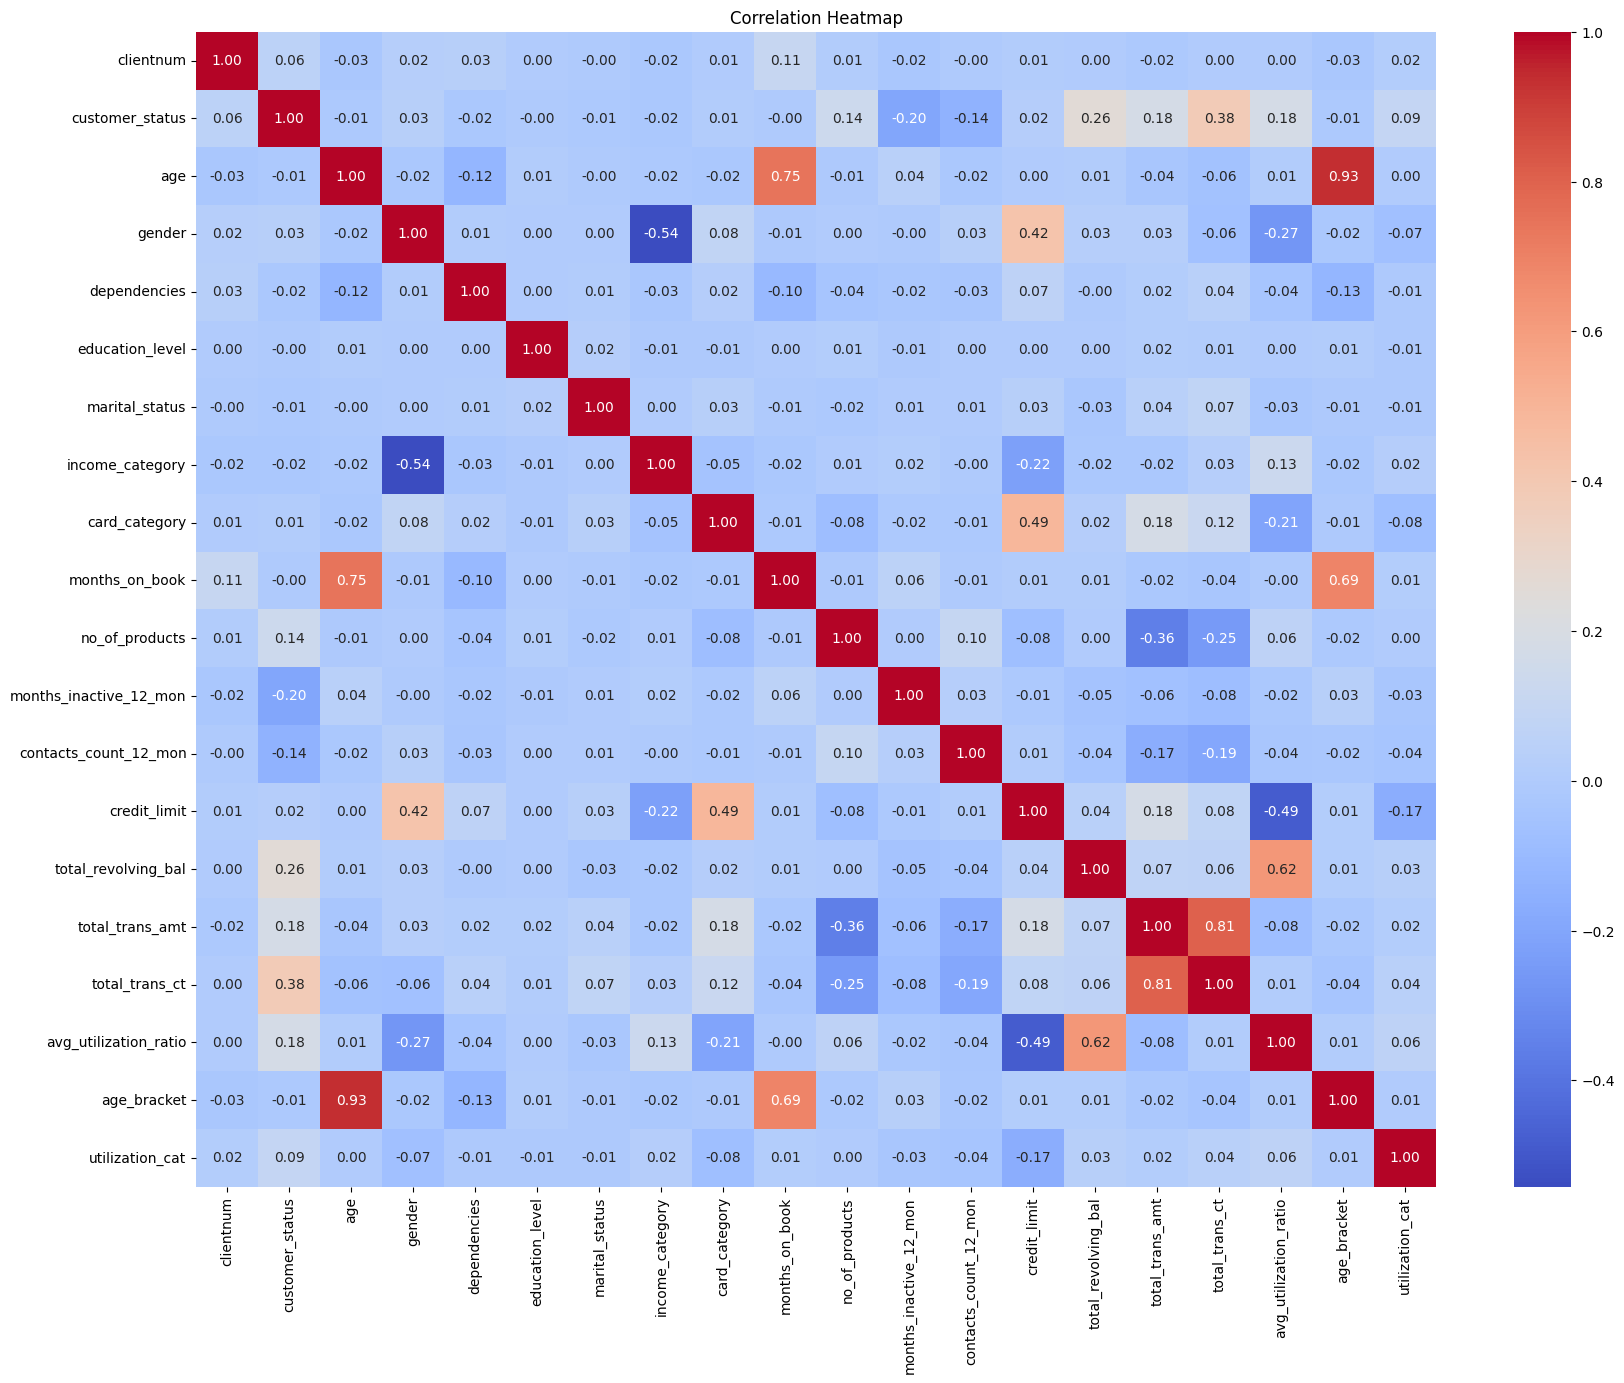

In [ ]:
# Load the dataset into the notebook, convert all columns to numerical values and plot on heatmap.

df = pd.read_csv('../data/cleaned_data/bankchurners.csv')
df.head()
my_objects = df.select_dtypes(include=['object']).nunique()

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

df.head()

corr = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Takeaways from this heatmap for further investigation: values >0.50 or <0.50.
Total transaction amount - Total transaction count: 0.81
Age - Months on book: 0.75
Total revolving balance - Utilization ratio: 0.62
Gender - Income category: -0.54

Other points of note: Values >0.25 & <=0.49 and > -0.25 & <= -0.49
Card category - Credit limit: 0.49
Gender - Credit limit: 0.42
Customer status - Total transaction count: 0.38
No. of products - Total transaction amount: 0.36
Gender - Average utilization ratio: 0.27
Customer status - Total revolving balance: 0.26
No. of products - Total transaction count: 0.25

### Correlation Values > 0.50 or < -0.50

| Pair of Variables | Correlation | Comments |
|--------------------|--------------|-----------|
| Total transaction amount – Total transaction count | **0.81** | Strong positive relationship — customers who spend more have more transactions. |
| Age – Months on book | **0.75** | Older customers more likely to stay loyal to the bank. |
| Total revolving balance – Utilization ratio | **0.62** | As revolving balance increases, card utilization rises accordingly. |
| Gender – Income category | **-0.54** | Gender is influencing income level. To be investigated further. |


### Correlation Values Between 0.25 & 0.49 or -0.25 & 0.49

| Pair of Variables | Correlation | Comments |
|--------------------|--------------|-----------|
| Card category – Credit limit | **0.49** | Higher-tier cards are associated with higher credit limits. Over 90% of individuals are on blue card. |
| Gender – Credit limit | **0.42** | Potential difference in assigned credit limits by gender. |
| Customer status – Total transaction count | **0.38** | Customers with fewer transactions may be more likely to churn. |
| No. of products – Total transaction amount | **0.36** | Customers holding more products tend to spend more. |
| Gender – Average utilization ratio | **0.27** | Difference in how genders use available credit. |
| Customer status – Total revolving balance | **0.26** | Higher revolving balances may correlate with customer churn. |
| No. of products – Total transaction count | **0.25** | More products correlate slightly with more frequent transactions. |

### Investigations into the dataset based on findings in correlation heatmap
To do this we will need to import the dataset. Statements to be investigated:
- Gender influences income category
- Gender has an influence on credit limit.

Given that these are both about money they might highlight a lack of distribution amongst males and females in our dataset. 

In [ ]:
#Import the dataset and load first five rows

df = pd.read_csv('../data/cleaned_data/bankchurners.csv')
df.head()

,clientnum,customer_status,age,gender,dependencies,education_level,marital_status,income_category,card_category,months_on_book,no_of_products,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct,avg_utilization_ratio,age_bracket,utilization_cat
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,1144,42,0.061,40s,Low
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,1291,33,0.105,40s,Low
2,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,1171,20,0.760,40s,High
3,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,1088,24,0.311,40s,Medium
4,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,1330,31,0.066,50s,Low


In [ ]:
# Check values within in
df['income_category'].value_counts()

income_category
Less than $40K    3066
$40K - $60K       1574
$80K - $120K      1379
$60K - $80K       1229
Unknown            951
$120K +            650
Name: count, dtype: int64

In [ ]:
# Checking value count of dataset amongst genders
df['gender'].value_counts()

gender
F    4688
M    4161
Name: count, dtype: int64

In [ ]:
# Group the values by gender and run the value counts again.
df.groupby('gender')['income_category'].value_counts()

gender  income_category
F       Less than $40K     2862
        Unknown             918
        $40K - $60K         908
M       $80K - $120K       1379
        $60K - $80K        1229
        $40K - $60K         666
        $120K +             650
        Less than $40K      204
        Unknown              33
Name: count, dtype: int64

In [ ]:
# Checking count of males in higher earning brackets
df[(df['gender'] == 'M') & (df['income_category'].isin(['$80K - $120K', '$60K - $80K', '$120k +']))].value_counts()

clientnum  customer_status    age  gender  dependencies  education_level  marital_status  income_category  card_category  months_on_book  no_of_products  months_inactive_12_mon  contacts_count_12_mon  credit_limit  total_revolving_bal  total_trans_amt  total_trans_ct  avg_utilization_ratio  age_bracket  utilization_cat
708084558  Attrited Customer  46   M       3             Doctorate        Divorced        $80K - $120K     Blue           38              6               3                       3                      8258.0        1771                 1447             23              0.214                  40s          Low                1
751166508  Existing Customer  57   M       3             Post-Graduate    Single          $80K - $120K     Blue           50              3               1                       1                      34516.0       2293                 14287            114             0.066                  50s          Low                1
737944908  Existing Custome

### Findings from investigation
Females outnumber males in this dataset by 500, that hasn't caused an issue. However high earning females are under represented in this dataset. Of the 4688 females over 50% earn less than 40k and none of them earn over $60,000 whereas 2608 males are accounted for in those categories. 

## Further statistical analysis
- Pie chart one shows the average churn rate for customers at the bank, pie chart two drills down into churn rate by card category.

- Plot two (violin plot) shows the distribution of credit limit given to customers across all 4 products. None of the cards have any minimum or maximum credit limit the blue card tends to be have the lower credit limit across the board whereas the silver, gold and platinum card customers have the higher average credit limits. There doesnt seem to be any criteria for who can apply for each card based on income, education level or marital status.

In [ ]:
# Check values of each category
df['card_category'].value_counts()

card_category
Blue        8228
Silver       498
Gold         103
Platinum      20
Name: count, dtype: int64

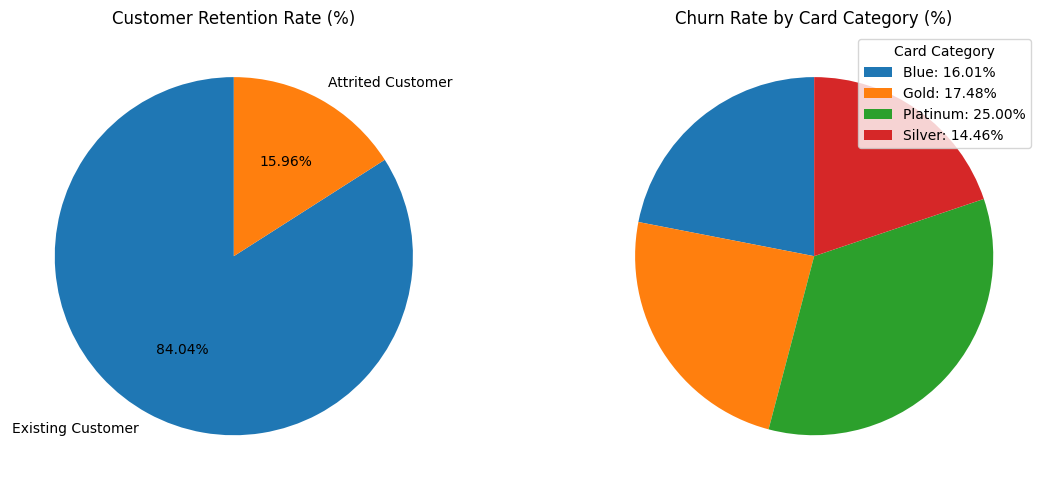

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart 1 - Customer churn (%)
categorical_count = df['customer_status'].value_counts(normalize=True)

axes[0].pie(
    x=categorical_count,
    labels=categorical_count.index,
    autopct='%1.2f%%',
    startangle=90
)
axes[0].set_title('Customer Retention Rate (%)')

# Pie chart 2 - Churn rate (%) by card category
total_by_card = df['card_category'].value_counts()

churned_by_card = df[df['customer_status'] == 'Attrited Customer']['card_category'].value_counts()

churn_percentage = (churned_by_card / total_by_card * 100).sort_index()

axes[1].pie(
    x=churn_percentage,
    labels=None,  
    startangle=90
)
axes[1].set_title('Churn Rate by Card Category (%)')

legend_labels = [f"{cat}: {pct:.2f}%" for cat, pct in zip(churn_percentage.index, churn_percentage)]
axes[1].legend(
    labels=legend_labels,
    loc='upper right',
    title='Card Category'
)

plt.tight_layout()
plt.show()

C:\Users\Steven\AppData\Local\Temp\ipykernel_10316\2583408134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


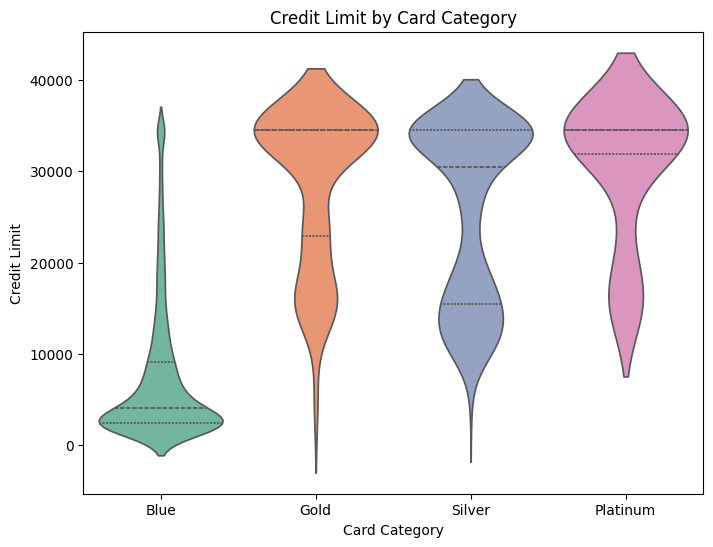

In [32]:
plt.figure(figsize=(8,6))
sns.violinplot(
    data=df,
    x='card_category', 
    y='credit_limit',       
    inner='quartile',         
    palette='Set2'            
)

plt.title('Credit Limit by Card Category')
plt.xlabel('Card Category')
plt.ylabel('Credit Limit')
plt.show()

We will drill down to see whether there are any prerequisites for applying for each card, or whether a certain one is popular amongst customers based on their education level, income or marital status. Values to be returned in descending order.

In [ ]:
# Sort by income.
df.groupby('card_category')['income_category'].value_counts(ascending=False)

card_category  income_category
Blue           Less than $40K     2931
               $40K - $60K        1470
               $80K - $120K       1250
               $60K - $80K        1113
               Unknown             889
               $120K +             575
Gold           $60K - $80K          25
               Less than $40K       21
               $80K - $120K         19
               $120K +              16
               $40K - $60K          14
               Unknown               8
Platinum       Unknown               5
               $60K - $80K           4
               Less than $40K        4
               $120K +               4
               $80K - $120K          2
               $40K - $60K           1
Silver         Less than $40K      110
               $80K - $120K        108
               $40K - $60K          89
               $60K - $80K          87
               $120K +              55
               Unknown              49
Name: count, dtype: int64

In [ ]:
# Sort by education level.
df.groupby('card_category')['education_level'].value_counts(ascending=False)

card_category  education_level
Blue           Graduate           2521
               High School        1654
               Unknown            1233
               Uneducated         1209
               College             822
               Post-Graduate       417
               Doctorate           372
Gold           Graduate             31
               High School          21
               Unknown              17
               College              15
               Uneducated           10
               Post-Graduate         5
               Doctorate             4
Platinum       Graduate              8
               Post-Graduate         3
               Uneducated            3
               Unknown               3
               Doctorate             2
               High School           1
Silver         Graduate            167
               High School          86
               Uneducated           75
               Unknown              68
               College           

In [ ]:
# Sort by marital status
df.groupby('card_category')['marital_status'].value_counts(ascending=False)

card_category  marital_status
Blue           Married           3891
               Single            3115
               Divorced           611
               Unknown            611
Gold           Single              52
               Married             34
               Unknown             12
               Divorced             5
Platinum       Single              10
               Married              7
               Unknown              2
               Divorced             1
Silver         Single             228
               Married            186
               Unknown             43
               Divorced            41
Name: count, dtype: int64

## Data Limitations
From this further statistical analysis we have been able to find some limitations in this dataset:
- High earning females (over $60k per year) are not represented in the dataset.
- As a result gender distribution of credit limit amongst gender is skewed towards males having more.
- Platinum card holders only amount to 20 people out of 8849. We don't have enough information to make an informed decision about the trends of platinum members that churn. Gold also only has 103 members.